# 🏦 Home Credit Default Risk 
## Notebook 4: Model Evaluation
**Nama:** [Faisal Soultan Muhammad]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Setup
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✅ Notebook 4: Model Evaluation Started")

✅ Notebook 4: Model Evaluation Started


## 1. Load Models and Data

In [3]:
import pickle

# Load trained models
with open('trained_models.pkl', 'rb') as f:
    models = pickle.load(f)

# Load evaluation results
with open('model_evaluations.pkl', 'rb') as f:
    eval_results = pickle.load(f)

# Load test data
with open('processed_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_test, y_test = data['X_test'], data['y_test']

print("📊 MODELS LOADED:")
for model_name, model in models.items():
    if model is not None:
        print(f"• {model_name.replace('_', ' ').title()}")

📊 MODELS LOADED:
• Logistic Regression
• Random Forest
• Xgboost


## 2. ROC Curve Comparison


📈 ROC CURVE ANALYSIS


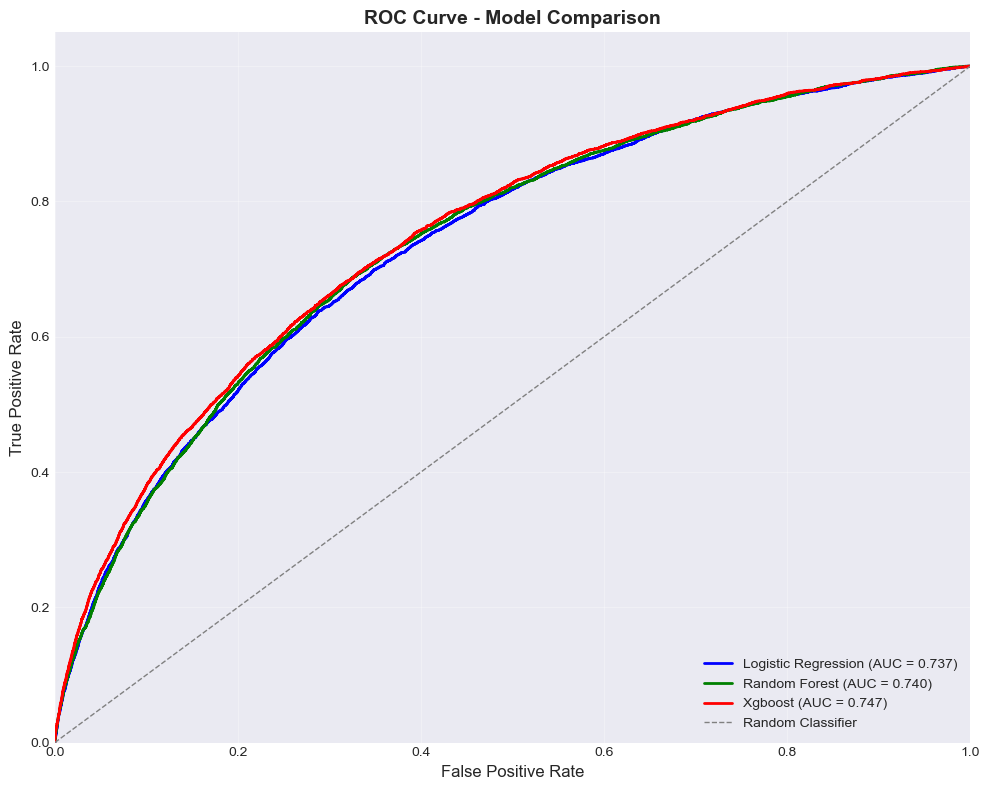

✅ Chart saved: roc_curves.png


In [4]:
print("\n" + "="*70)
print("📈 ROC CURVE ANALYSIS")
print("="*70)

from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))

# Plot ROC for each model
colors = ['blue', 'green', 'red']
model_names = []

for idx, (model_name, results) in enumerate(eval_results.items()):
    if results is not None and 'probabilities' in results:
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
        roc_auc = auc(fpr, tpr)
        
        # Plot
        plt.plot(fpr, tpr, color=colors[idx], 
                lw=2, label=f'{model_name.replace("_", " ").title()} (AUC = {roc_auc:.3f})')
        model_names.append(model_name)

# Plot random classifier
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')

# Format plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curves.png', dpi=100, bbox_inches='tight')
plt.show()
print("✅ Chart saved: roc_curves.png")

## 3. Precision-Recall Curve


🎯 PRECISION-RECALL ANALYSIS


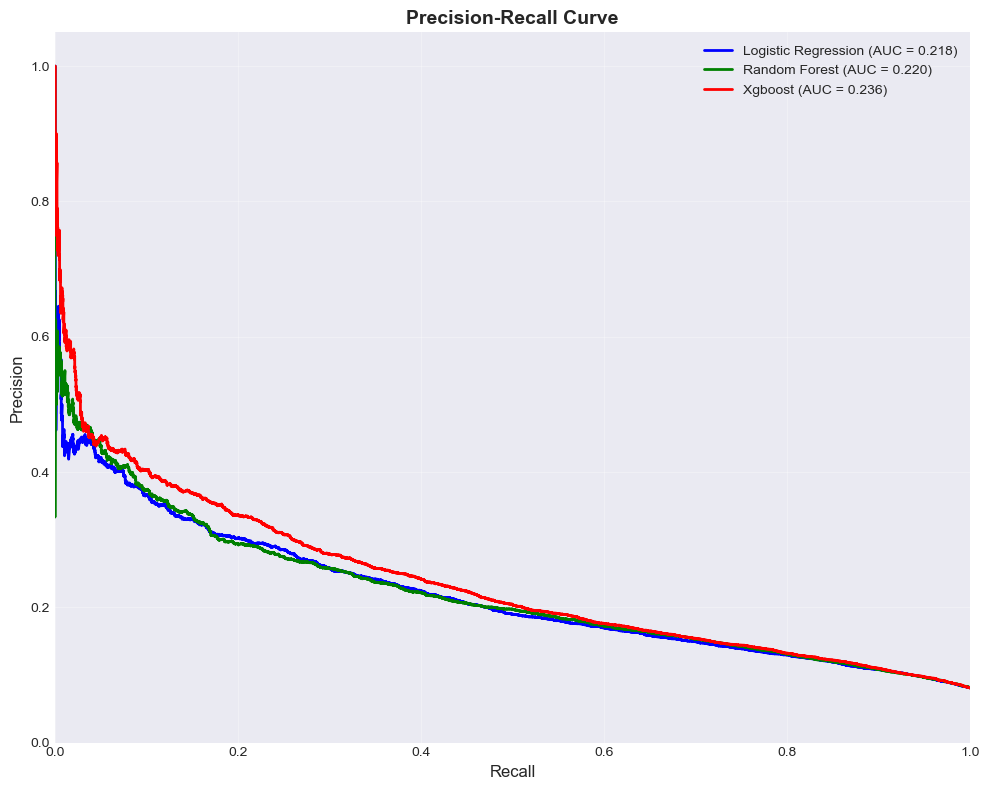

✅ Chart saved: precision_recall_curves.png


In [5]:
print("\n" + "="*70)
print("🎯 PRECISION-RECALL ANALYSIS")
print("="*70)

plt.figure(figsize=(10, 8))

for idx, (model_name, results) in enumerate(eval_results.items()):
    if results is not None and 'probabilities' in results:
        # Calculate Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_test, results['probabilities'])
        pr_auc = auc(recall, precision)
        
        # Plot
        plt.plot(recall, precision, color=colors[idx], 
                lw=2, label=f'{model_name.replace("_", " ").title()} (AUC = {pr_auc:.3f})')

# Format plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('precision_recall_curves.png', dpi=100, bbox_inches='tight')
plt.show()
print("✅ Chart saved: precision_recall_curves.png")

## 4. Confusion Matrix Visualization


📊 CONFUSION MATRICES


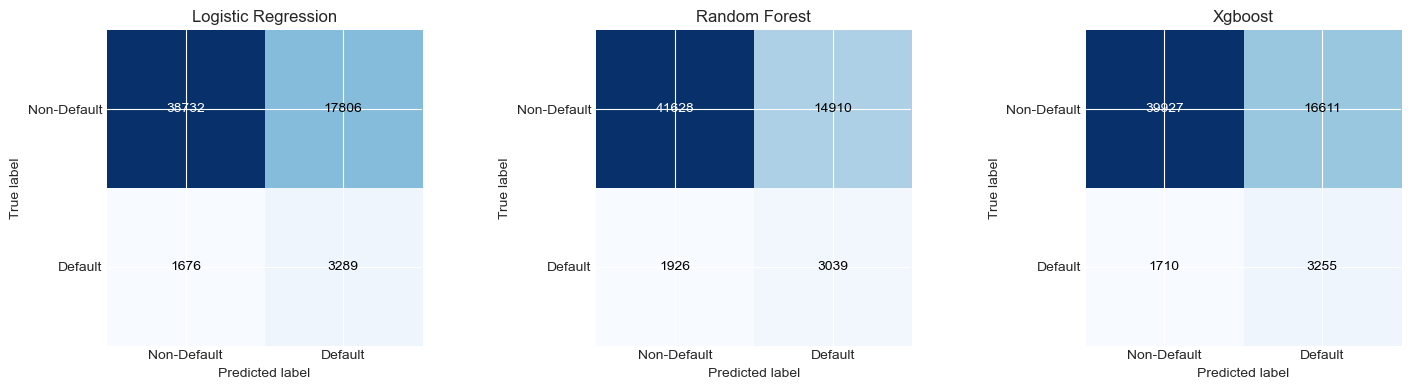

✅ Chart saved: confusion_matrices.png


In [6]:
print("\n" + "="*70)
print("📊 CONFUSION MATRICES")
print("="*70)

# Create subplots for confusion matrices
n_models = len([m for m in models.values() if m is not None])
fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))

if n_models == 1:
    axes = [axes]

model_idx = 0
for model_name, results in eval_results.items():
    if results is not None and 'predictions' in results:
        # Calculate confusion matrix
        cm = confusion_matrix(y_test, results['predictions'])
        
        # Plot confusion matrix
        ax = axes[model_idx]
        im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        ax.set_title(f'{model_name.replace("_", " ").title()}', fontsize=12)
        
        # Add text annotations
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if cm[i, j] > thresh else "black")
        
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(['Non-Default', 'Default'])
        ax.set_yticklabels(['Non-Default', 'Default'])
        
        model_idx += 1

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=100, bbox_inches='tight')
plt.show()
print("✅ Chart saved: confusion_matrices.png")

## 5. Performance Metrics Table

In [7]:
print("\n" + "="*70)
print("📋 PERFORMANCE METRICS SUMMARY")
print("="*70)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each model
metrics_data = []

for model_name, results in eval_results.items():
    if results is not None and 'predictions' in results:
        y_pred = results['predictions']
        
        metrics = {
            'Model': model_name.replace('_', ' ').title(),
            'ROC-AUC': f"{results.get('roc_auc', 0):.4f}",
            'Accuracy': f"{accuracy_score(y_test, y_pred):.4f}",
            'Precision': f"{precision_score(y_test, y_pred):.4f}",
            'Recall': f"{recall_score(y_test, y_pred):.4f}",
            'F1-Score': f"{f1_score(y_test, y_pred):.4f}"
        }
        metrics_data.append(metrics)

# Create and display DataFrame
metrics_df = pd.DataFrame(metrics_data)
print("\n" + metrics_df.to_string(index=False))

# Save metrics table
metrics_df.to_csv('model_performance_metrics.csv', index=False)
print("\n✅ Saved: model_performance_metrics.csv")


📋 PERFORMANCE METRICS SUMMARY

              Model ROC-AUC Accuracy Precision Recall F1-Score
Logistic Regression  0.7369   0.6832    0.1559 0.6624   0.2524
      Random Forest  0.7400   0.7263    0.1693 0.6121   0.2653
            Xgboost  0.7469   0.7021    0.1638 0.6556   0.2622

✅ Saved: model_performance_metrics.csv


## 6. Business Impact Analysis

In [8]:
print("\n" + "="*70)
print("💰 BUSINESS IMPACT ANALYSIS")
print("="*70)

# Simulate business impact
# Assumptions for calculation
avg_loan_amount = 500000  # Average loan amount in currency
profit_margin = 0.15      # 15% profit on good loans
loss_on_default = 0.6     # 60% loss on defaulted loans

# Use best model predictions
best_model_name = max(eval_results.items(), key=lambda x: x[1]['roc_auc'] if x[1] else 0)[0]
best_results = eval_results[best_model_name]

if best_results:
    y_pred_best = best_results['predictions']
    
    # Calculate metrics for business impact
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
    
    # Scenario 1: Current situation (no model)
    total_applications = len(y_test)
    actual_defaults = y_test.sum()
    actual_good = total_applications - actual_defaults
    
    # Scenario 2: With model predictions
    predicted_defaults = y_pred_best.sum()
    predicted_good = total_applications - predicted_defaults
    
    # Calculate financial impact
    # Without model: approve all, get defaults
    revenue_without_model = actual_good * avg_loan_amount * profit_margin
    loss_without_model = actual_defaults * avg_loan_amount * loss_on_default
    net_without_model = revenue_without_model - loss_without_model
    
    # With model: only approve predicted good
    # But we might reject some good ones (false positives)
    approved_good = tn  # True negatives: actually good and predicted good
    rejected_good = fp  # False positives: actually good but predicted bad
    approved_bad = fn   # False negatives: actually bad but predicted good
    rejected_bad = tp   # True positives: actually bad and predicted bad
    
    revenue_with_model = approved_good * avg_loan_amount * profit_margin
    loss_with_model = approved_bad * avg_loan_amount * loss_on_default
    opportunity_loss = rejected_good * avg_loan_amount * profit_margin
    net_with_model = revenue_with_model - loss_with_model - opportunity_loss
    
    # Improvement
    improvement = net_with_model - net_without_model
    improvement_pct = (improvement / abs(net_without_model)) * 100 if net_without_model != 0 else 0
    
    print(f"\n📈 BUSINESS IMPACT USING {best_model_name.upper().replace('_', ' ')}:")
    print("-"*50)
    print(f"Total applications analyzed: {total_applications:,}")
    print(f"Actual defaults: {actual_defaults:,} ({actual_defaults/total_applications*100:.1f}%)")
    print(f"\nModel predictions:")
    print(f"• Approved (predicted good): {predicted_good:,}")
    print(f"• Rejected (predicted bad): {predicted_defaults:,}")
    print(f"\nFinancial impact (simplified):")
    print(f"• Net profit without model: {net_without_model:,.0f}")
    print(f"• Net profit with model: {net_with_model:,.0f}")
    print(f"• Improvement: {improvement:,.0f} ({improvement_pct:+.1f}%)")
    
    # Save business impact
    biz_impact = {
        'model_used': best_model_name,
        'total_applications': total_applications,
        'net_profit_without_model': net_without_model,
        'net_profit_with_model': net_with_model,
        'improvement': improvement,
        'improvement_pct': improvement_pct
    }
    
    with open('business_impact.pkl', 'wb') as f:
        pickle.dump(biz_impact, f)
    print("\n✅ Business impact analysis saved")


💰 BUSINESS IMPACT ANALYSIS

📈 BUSINESS IMPACT USING XGBOOST:
--------------------------------------------------
Total applications analyzed: 61,503
Actual defaults: 4,965 (8.1%)

Model predictions:
• Approved (predicted good): 41,637
• Rejected (predicted bad): 19,866

Financial impact (simplified):
• Net profit without model: 2,750,850,000
• Net profit with model: 1,235,700,000
• Improvement: -1,515,150,000 (-55.1%)

✅ Business impact analysis saved


## 🎯 EVALUATION COMPLETE!

**Notebook 4 selesai** 

**Lanjut ke Notebook 5:** `05_business_insights.ipynb`

In [9]:
print("\n" + "="*70)
print("✅ NOTEBOOK 4 COMPLETED!")
print("="*70)
print("\n✅ ROC and Precision-Recall curves created")
print("✅ Confusion matrices visualized")
print("✅ Performance metrics calculated")
print("✅ Business impact analyzed")
print("\n➡️  NEXT: Create '05_business_insights.ipynb'")


✅ NOTEBOOK 4 COMPLETED!

✅ ROC and Precision-Recall curves created
✅ Confusion matrices visualized
✅ Performance metrics calculated
✅ Business impact analyzed

➡️  NEXT: Create '05_business_insights.ipynb'
